## <span style="color:blue">  Numerical exercises 9</span>


Gli algoritmi genetici sono algoritmi di ricerca basati su regole di selezione naturale e genetica. Si tratta di un processo di Markov in cui la ricerca tra molte generazioni si propaga valutando la fitness degli individui con un certo patrimonio genetico.



### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.


Nella costruzione dell'algoritmo genetico si è proceduto nel seguente modo:

1. Si è generata una sequenza ordinata di città di posizione $\vec c_1,\dots, \vec c_N$ su di una mappa.Per far questo ho implementato una classe $\textbf{Maps}$ il cui costruttore genera un vettore  di strutture $\textbf{Pos}$ i cui data membri rappresentano la posizione $(x,y)$ di ogni città. La classe contiene anche un mentodo per il calcolo delle distanze tra due città della mappa chiamato $\textit{Dist}$ che vuole come argomento gli indici delle città in considerazione e restituisce un double.
    
  
2. Una volta costruita la mappa delle città si è generata la popolazione degli individui, ovvero si è creato un vettore di ogetti di tipo $\textbf{Chrom}$. La classe $\textbf{Chrom}$ permette di creare degli oggetti costituiti da un $\textit{vec}$ di interi di dimensione $N$ riempito con una permutazione dei numeri compresi tra $[0,N)$. L'idea è che ogni elemento del vettore della classe $\textbf{Chrom}$ è   l'indice di una città. In questo modo è possibile ho quindi mappato un certo percorso tra le città e l'individuo. La stessa classe presenta un metodo che ha in input un oggetto della classe $\textbf{Maps}$ e che permette di calcolare la loss function ovvero la lunghezza del percorso  $$L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$$che è la quantità che si vuole minimizzare.

    
3. Una volta generata la popolazione di individui viene eseguita la Selezione di individui (per il crossover) la cui scelta si deve basare sui valori di fitness. Per fare questo si è utilizzato il metodo della "rigged roulette". Una volta calcolata la loss function legata ad ogni individuo, si è ordinato il vettore popolazione in ordine crescente di $L^{(1)}$ e quindi in ordine decrescente di fitness. Ogni volta che l'algortimo deve selezionare un certo individuo per l'operazione di Crossover viene estratto un indice: $$r=|\{rand[0,1)\}^p\cdot N|+1$$  con  $p\geq 1$, ($p=2$). Questo metodo mappa una certa distribuzione piatta di interi tra $[0,N]$ in una distribuzione per cui si ha maggiore probabilità di selezionare un indice piccolo, permettendo di selezionare con maggiore probabilità gli individui con loss function.


4. Selezionati gli individui si è effettuato il Crossover e generato due figli mescolando il patrimonio genetico del padre e della madre. Ho implementato il crossover utilizzando un costruttore della classe $\textbf{Chrom}$ che ha come argomento due oggetti di tipo $\textit{Chrom}$ e un indice estratto casualmente tra $(0,N)$ che indica l'indice a cui tagliare i vettori sia del padre. A questo punto viene creato l'individuo figlio che presenta la prima parte del vettore tagliato del primo individuo passato in argomento e poi completato aggiungendo le città mancanti ovvero gli interi del secondo individuo non presenti nella sequenza tagliata tagliata del primo. Tale operazione di Crossover viene effettuata con una probabilità $P_c<0.8$.

5. Una volta generata la nuova popolazione si sono effettuate le mutazioni su tutti gli individui. In particolare si è implementata la scambio di due elementi, lo shiht di $n$ posizioni per ogni elemento, lo shift di $n$ di $m$ città contigue e infine l'inversione dell'ordine in cui appaiono $m$ città con $(m\leq N$, $P_m<0.1)$. Infine si è sfruttato l'elitarietà in cui veniva sostituito il peggiore individuo della nuova popolazione e sostituito con il miglior individuo della popolazione precedente ($P_e\leq0.05$).

6. Si è iterato infine tale procedimento.

Apply your code to the optimization of a path among 

- 30 cities randomly placed **on** a circumference
- 30 cities randomly placed **inside** a square

Show your results via:

- a picture of  ($L^{(1)}$) of the best path and of $\langle L^{(1)}\rangle$, averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path

La simulazione è stata effettuata considerando $30$ città, una popolazione di $N_p=50$ individui e un numero di generazioni $N_g=500$.

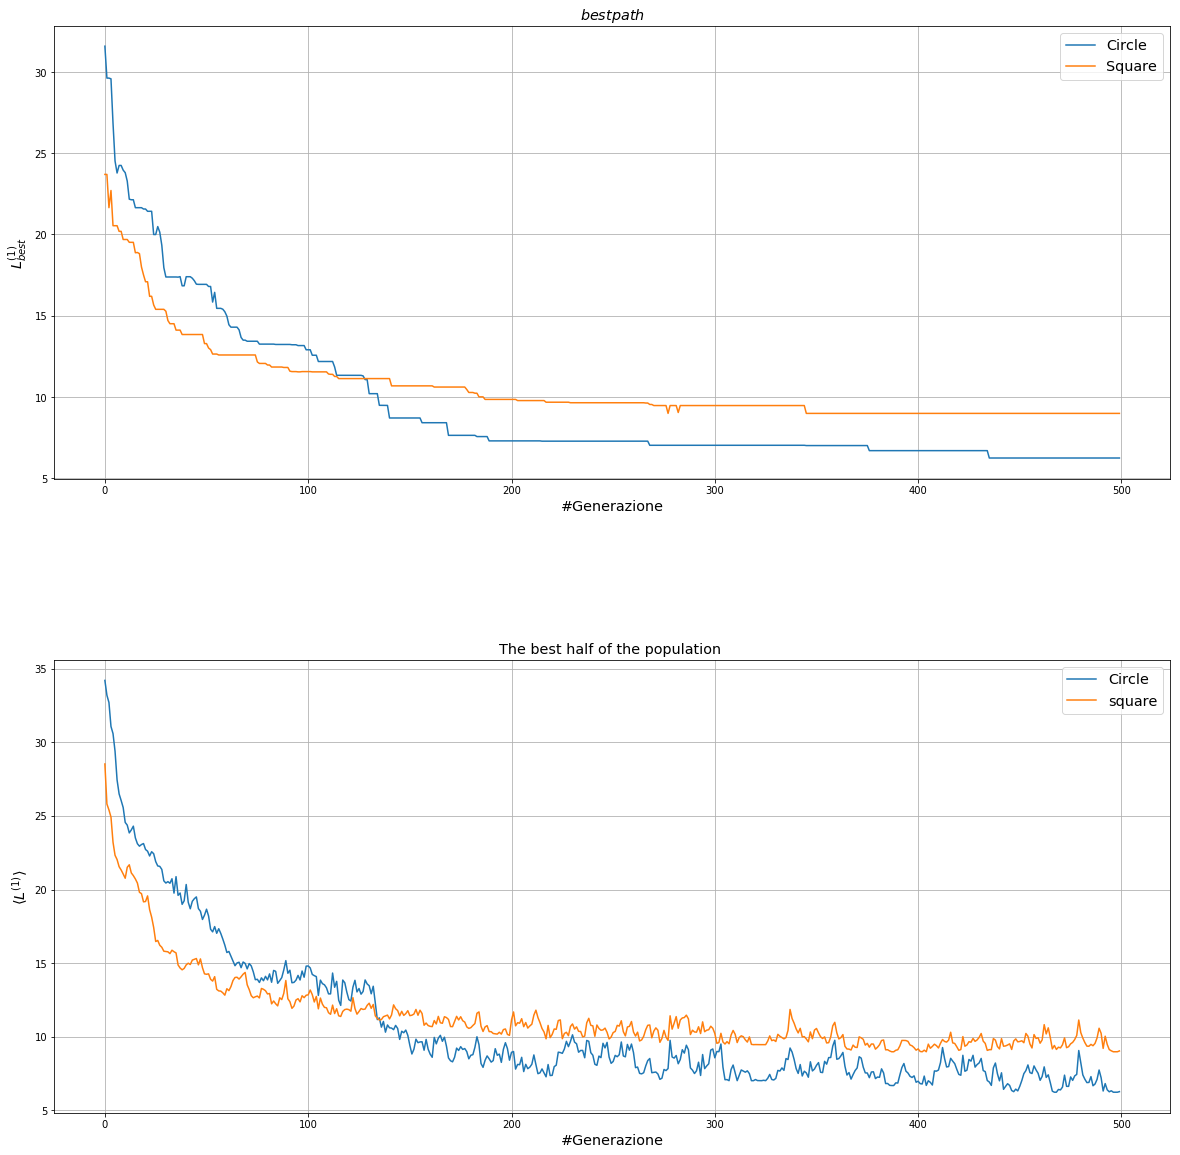

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math
import matplotlib.gridspec as gridspec



N_gen_c, I_best_c, = np.loadtxt("Es9/Best_circ.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_gen_r, I_best_r, = np.loadtxt("Es9/Best_rec.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_gen_half_c, I_best_half_c= np.loadtxt("Es9/Half_circ.dat", usecols=(0,1), delimiter='\t', unpack='true')
N_gen_half_r, I_best_half_r= np.loadtxt("Es9/Half_rec.dat", usecols=(0,1), delimiter='\t', unpack='true')


G = gridspec.GridSpec(2,1)
f = plt.figure(figsize=(20,20))
f.subplots_adjust(hspace=0.4, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(N_gen_c,I_best_c,label="Circle")
fig_1.plot(N_gen_r,I_best_r,label="Square")
fig_1.set_title(r'$ best path$',fontsize='x-large')
fig_1.set_xlabel('#Generazione',fontsize='x-large')
fig_1.set_ylabel(r'$L^{(1)}_{best}$',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[1, 0])
fig_2.plot(N_gen_half_c,I_best_half_c,label="Circle")
fig_2.plot(N_gen_half_r,I_best_half_r,label="square")
fig_2.set_title('The best half of the population ',fontsize='x-large')
fig_2.set_xlabel('#Generazione',fontsize='x-large')
fig_2.set_ylabel(r'$\langle L^{(1)}\rangle$',fontsize='x-large')
fig_2.legend(fontsize='x-large')
fig_2.grid(True)

plt.show()

Si nota come all'aumentare del numero di generazione il miglior individuo tende molto rapidamente al valore minimo, così come succede per la prima metà della popolazione il cui valor medio oscilla

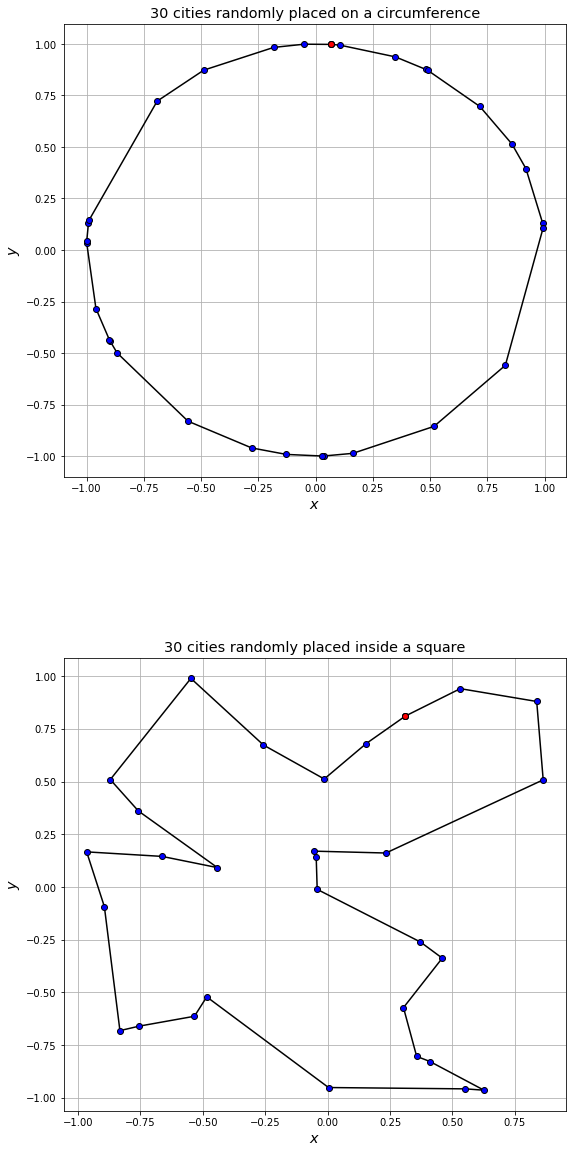

In [17]:
i_c, x_c, y_c= np.loadtxt("Es9/Maps_circ", usecols=(0,1,2), delimiter='\t', unpack='true')
i_s, x_s, y_s= np.loadtxt("Es9/Maps_rect", usecols=(0,1,2), delimiter='\t', unpack='true')

G = gridspec.GridSpec(2,1)
f = plt.figure(figsize=(9,20))
f.subplots_adjust(hspace=0.4, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(x_c, y_c, linestyle='-',color='k', marker='o',markerfacecolor='blue')
fig_1.plot(x_c[0],y_c[0],linestyle='-',color='k', marker='o',markerfacecolor='red')
fig_1.set_title(r'30 cities randomly placed on a circumference',fontsize='x-large')
fig_1.set_xlabel('$x$',fontsize='x-large')
fig_1.set_ylabel(r'$y$',fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[1, 0])
fig_2.plot(x_s, y_s, linestyle='-',color='k', marker='o',markerfacecolor='blue')
fig_2.plot(x_s[0],y_s[0],linestyle='-',color='k', marker='o',markerfacecolor='red')
fig_2.set_title(r'30 cities randomly placed inside a square',fontsize='x-large')
fig_2.set_xlabel('$x$',fontsize='x-large')
fig_2.set_ylabel(r'$y$',fontsize='x-large')

fig_2.grid(True)


plt.show()


